# Voorwaartse verwijzingen
## Details
> Voorwaartse   verwijzingen   (1)   lokken   lezers   met succes  naar  het  artikel,omdat  ze  de  lezer  in  het ongewisse  laten.  Pas  in  het  artikel  wordt  duidelijk wat er met de voorwaartse verwijzing in de kop werd bedoeld.   Voorwaartse   verwijzingen   zijn   meestal woorden zoals dit, deze, zo, hij/zij, waarom, wie, wat, enzovoorts.In  dit  onderzoek  beschouwen  we  ook  niet  nader gespecifieerde koppen (2) als voorwaartse verwijzingen. Hiermee bedoelen we dus koppen die informatie achterhouden,waardoor bepaalde details onbekend blijven voor de lezer als ze het artikel niet lezen.
## Examples
> (1) Straffer dan Cirque du Soleil: deze actkreeg een gouden buzzer in 'America's got Talent'Vs. Dansgroep  vol  jongerenverstomt  jury  van America's Got Talent: "Ik denk dat ons leven net veranderd is"
> (2) Trump maakt    zich    belachelijktijdens "haastig" feestjeVs. Trump vergeet    tekst volksliedtijdens "haastig" feestje

## Data

In [2]:
from util import get_cls_train_test

train_x, train_y, test_x, test_y = get_cls_train_test("Voorwaartse Verwijzing")
train_y.value_counts()

0    544
1    137
Name: Voorwaartse Verwijzing, dtype: int64

## Approach 1: Tf-idf

f-score: 0.4772727272727273
Confusion matrix: (TP: 160, FP: 20, FN: 26, TN: 21)
Accuracy=79.74% (181/227)


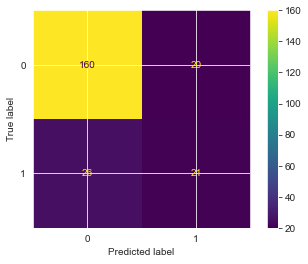

In [7]:
from sklearn import svm
from util import stem_analyzer, fit_predict_evaluate
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

from sklearn.feature_extraction.text import TfidfVectorizer

model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=stem_analyzer)),
    ('resampler', SMOTETomek(random_state=42)),
    ('classifier', svm.LinearSVC(random_state=42))
])

fit_predict_evaluate(model, train_x, train_y, test_x, test_y)

In [5]:
# analyseer de belangrijkste features
from util import show_most_informative_features
show_most_informative_features(model)

3.2698            dez    -0.8415            bij
2.1580            dit    -0.7906             in
1.8388             zo    -0.7375            dod
1.7030         waarom    -0.7060             me
1.6050            wet    -0.6992            wie
1.2248         lelijk    -0.6941           niet
1.1487            fan    -0.6631        fortnit
1.1451         opmerk    -0.6593             ik
1.1249             er    -0.6457           sted
1.1242       bedreigd    -0.6404             va


## Approach 2: Daniel Siahaan, Izzatul Umami
Siahaan, D., & Umami, I. (2012). Natural language processing for detecting forward reference in a document. IPTEK The Journal for Technology and Science, 23(4).

There are Meyer's seven since when writing software requirements. One of those sins are forward references. Given paper describes methods for detecting those forward references with NLP. "Forward reference refers to a first appearance of a term in passage which precedes it's definition". This paper is focussed on definitions of elements (by looking for used elements and linking it to their definition), so not relevant for our use case, since our forward are more of the form "Deze", "Tips" ... and not definitions of complicated words as forward definition. It works by checking whether a word is common knowledge (using Wikipedia) and if it's not common knowledge, it checks whether there is a definition in the text (and definitions have often a standard format in sentence parsing).

## Approach 3: Clickbait-based papers
Agrawal, A. (2016, October). Clickbait detection using deep learning. In 2016 2nd international conference on next generation computing technologies (NGCT) (pp. 268-272). IEEE.

This paper is about clickbait detection. Since "Forward referencing" is a technique used in clickbait, concept in this paper might also be useful for this (note: as the paper mentions, the goal of clickbait is misleading the reader to click, this isn't misleading). They convert the headlines into word embeddings which serves as input to their convolutional neural network.
Model summary: Word embedding (e.g. word2vec), input into 3 conv-mxpool-{3,4,5} layers, concat, reshape, dropout, adam

Random sidenote for later: I found a page listing some dutch word embedding models: https://dutch-nlp-resources.readthedocs.io/en/latest/models.html

Another paper by Blom and Hansen is mentioned here, which studied forward referencing on Danish News sites, which is the same as we're doing (but then for Dutch headlines), so let's look more into that.

> There are two forms of forward-referencing: discourse deixis en cataphora.
> discourse deixis: reference to forthcoming (parts of the) discourse relative to the current location in the disxourse, e.g. *This* is the best news story you will ever read.
> cataphora: Not at the discourse level, but to a word or a phrselater in the sentence or text, e.g. When *he* arrived at the crime scene, the journalist interviewed the victim's wife. (he refers to the yournalist).

The paper was more about forward referencing itself and not about the automatic detection of it, so not useful for now.

The implementation of the CNN of the previous paper might be something useful if we've got enough time. For now, we stick to the Tf-Idf classification technique.